# **Final Exam for Deep Network Development PART 2 (Access to AI Lab)**

This notebook contains the a problem solving task, from which you have to use all your acquired knowledge during the semester to solve it.

Please note that, solving the **SECOND PART IS OPTIONAL**. If you fail it, your grade is not affected. If you pass it, you can get +1 in the final grade if needed and be elegible for the AI Lab.

## Your information

**Full Name**:

**Neptun code:**

**Date:** 02/06/2023 10:30AM-12PM

# **PART TWO**

## Task Description

#### Your task is to provide a solution that exchanges the color of clothes between 2 people. The color of the clothes of person A should be the color of the clothes of person B, and vice-versa.

#### This task should be **SOLVED IN 1 HOUR AND 30 MINUTES** and submitted to Canvas (download the .ipynb file). Please note that after the time expires, the Canvas exam assignment will be closed and you cannot submit your solution. 

### Input
![](https://drive.google.com/uc?export=view&id=19f5LGg06wdnK3vcM6-KA5bmNfPDilkpE)

## Models

You can use ANY MODEL you want. However, I recommend you to use PyTorch models and specifically:
- YOLO
- U2NET (https://github.com/levindabhi/cloth-segmentation)

## Installation for U2NET

In [ ]:
# Download repo
!git clone https://github.com/levindabhi/cloth-segmentation.git
%cd cloth-segmentation

# Download pre-trained model
# https://drive.google.com/file/d/1-pUvA9W-j-x60XW_oTQKpHMvpVS5esDM/view?usp=sharing
!gdown 1-pUvA9W-j-x60XW_oTQKpHMvpVS5esDM
#!curl -L -s -o cloth_segm_u2net_latest.pth 'https://drive.google.com/uc?id=1-pUvA9W-j-x60XW_oTQKpHMvpVS5esDM&confirm=t'

# Prepare folders
!mkdir input_images
!mkdir output_images

In [ ]:
# Only use this if you want to use YOLOv5
!pip install -U ultralytics

## Imports

In [ ]:
import os
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np

import cv2
from google.colab import files
import os
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms

from collections import OrderedDict
from data.base_dataset import Normalize_image

from networks import U2NET

from google.colab.patches import cv2_imshow

## Utils

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #make sure that you are using GPU acceleration
print(device)
image_dir = 'input_images'
result_dir = 'output_images'
checkpoint_path = 'cloth_segm_u2net_latest.pth'

Download input image

In [ ]:
!gdown --id 19f5LGg06wdnK3vcM6-KA5bmNfPDilkpE
!mv example_7.png input_images/example_7.png

In [ ]:
def load_image():
  image = cv2.imread('input_images/example_7.png')
  return [image]

Detection related utils

In [ ]:
# If YOLO is used
PERSON_ID = 0

def load_detector():
  return torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def visualize_detections(image, boxes):
  img = image.copy()
  for box in boxes:
    cv2.rectangle(img, (int(box[0]),int(box[1])), (int(box[2]),int(box[3])), (0,255,0), 2)
  cv2_imshow(img)

Segmentation related utils

In [ ]:
# If U2NET is used
def load_checkpoint_mgpu(model, checkpoint_path):
    if not os.path.exists(checkpoint_path):
        print("----No checkpoints at given path----")
        return
    model_state_dict = torch.load(checkpoint_path, map_location=torch.device("cpu"))
    new_state_dict = OrderedDict()
    for k, v in model_state_dict.items():
        name = k[7:]  # remove `module.`
        new_state_dict[name] = v

    model.load_state_dict(new_state_dict)
    print("----checkpoints loaded from path: {}----".format(checkpoint_path))
    return model

def load_segmentator():
  path = 'cloth_segm_u2net_latest.pth'
  net = U2NET(in_ch=3, out_ch=4)
  net = load_checkpoint_mgpu(net, path)
  net = net.to(device)
  net = net.eval()
  return net

def visualize_segmentation(image, palette):
  #Expects a PIL image
  image.putpalette(palette)
  display(image)

def get_palette(num_cls):
    """ Returns the color map for visualizing the segmentation mask.
    Args:
        num_cls: Number of classes
    Returns:
        The color map
    """
    n = num_cls
    palette = [0] * (n * 3)
    for j in range(0, n):
        lab = j
        palette[j * 3 + 0] = 0
        palette[j * 3 + 1] = 0
        palette[j * 3 + 2] = 0
        i = 0
        while lab:
            palette[j * 3 + 0] |= (((lab >> 0) & 1) << (7 - i))
            palette[j * 3 + 1] |= (((lab >> 1) & 1) << (7 - i))
            palette[j * 3 + 2] |= (((lab >> 2) & 1) << (7 - i))
            i += 1
            lab >>= 3
    return palette

palette = get_palette(4)
palette

## YOUR SOLUTION

In [ ]:
def detect_people(model, images):
  pass

def segment_clothes(model, images):
  pass

def exchange_color(images, masks):
  pass

In [ ]:
# This is just for guidance, feel free to change it as you want.
def solution():
  
  # If you use YOLO then pass the image as a list 'image_list',
  # otherwise use the variable 'image'
  image_list = load_image()
  image = image_list[0]

  # Detect people
  detector = load_detector()
  people_boxes = detect_people(detector, image_list)

  person_images = None

  visualize_detections(image, people_boxes)

  # Segment clothes
  segmentator = load_segmentator()
  clothes_segmented = segment_clothes(segmentator, person_images)

  palette = get_palette(4)
  visualize_segmentation(clothes_segmented[0],palette)

  masks = None

  # Exchange the colors of the clothes
  result = exchange_color(person_images, masks)

  display(result)


In [ ]:
solution()

## Example

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-31 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


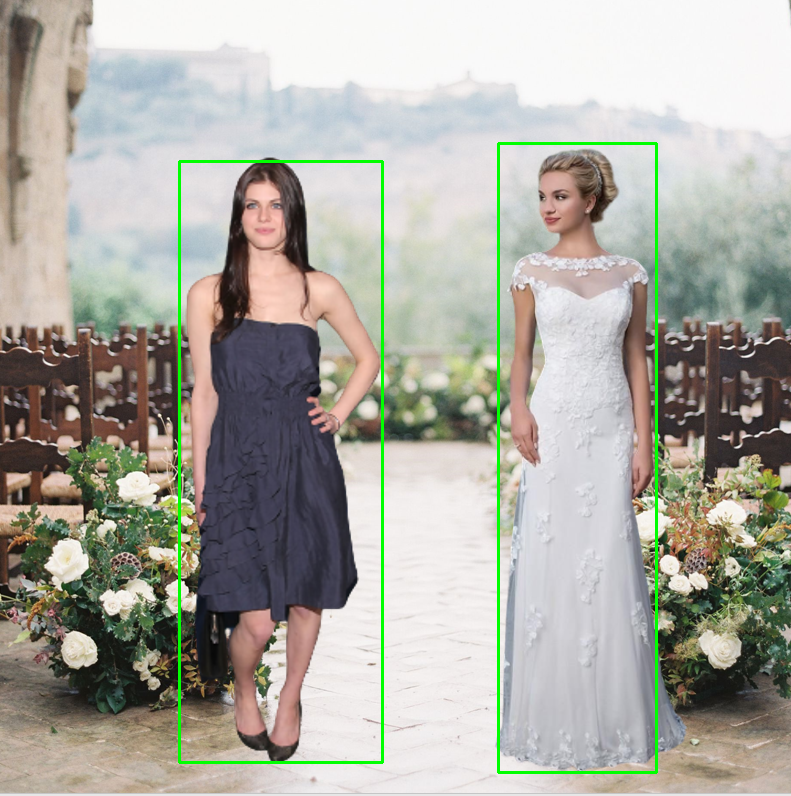

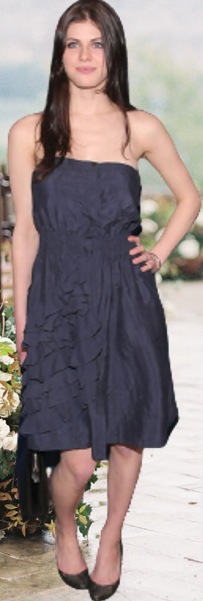

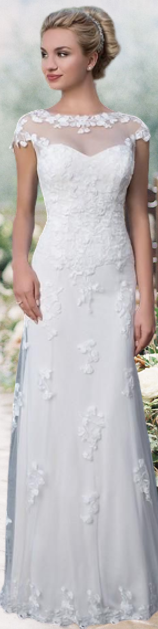

----checkpoints loaded from path: cloth_segm_u2net_latest.pth----


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


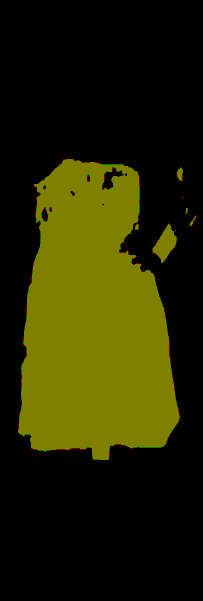

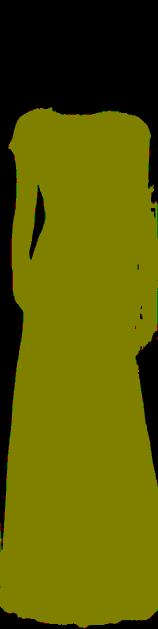

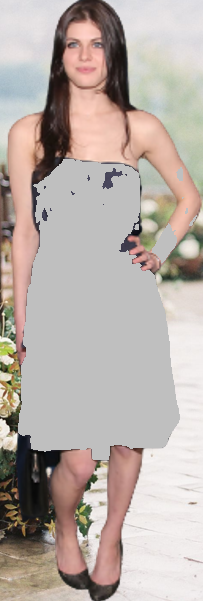

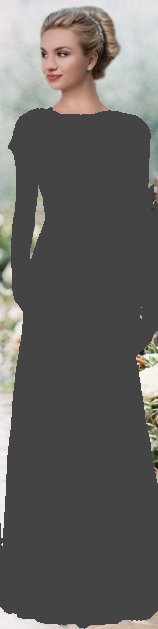

In [ ]:
solution()

Unfortunately, the U2NET clothes segmentation is not perfect, so parts of the body may be segmented. You can use other solutions, it is totally up to you.